# Softmax test
Here I am going to test two things about softmax:
* Distance between elements
* How does the length of the vector that is normalizing affects the effects.

In [6]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.0)

##### Distance between elements

In [3]:
def create_vector(base, distance, repeat):

    x = base
    y = x - distance

    vector = [x, y]
    for _ in range(repeat):
        vector.append(y)
    vector = np.array(vector)
    
    return vector

In [5]:
distance = 2.0 
base = 1.0
repeat = 0
vector = create_vector(base, distance, repeat)

array([ 1., -1.])

In [7]:
from connectivity_functions import softmax

In [11]:
G = 1.0
out = softmax(vector, t=G, minicolumns=vector.size)

In [14]:
mapped_distance = out[0] - out[1]

#### Let's test the distance between them

In [31]:
distances = np.arange(0, 10, 0.5)
mapped_distances = []
base = 1.0
repeat = 0

for distance in distances:
    vector = create_vector(base, distance, repeat)
    out = softmax(vector, t=G, minicolumns=vector.size)
    mapped_distance = out[0] - out[1]
    mapped_distances.append(mapped_distance)

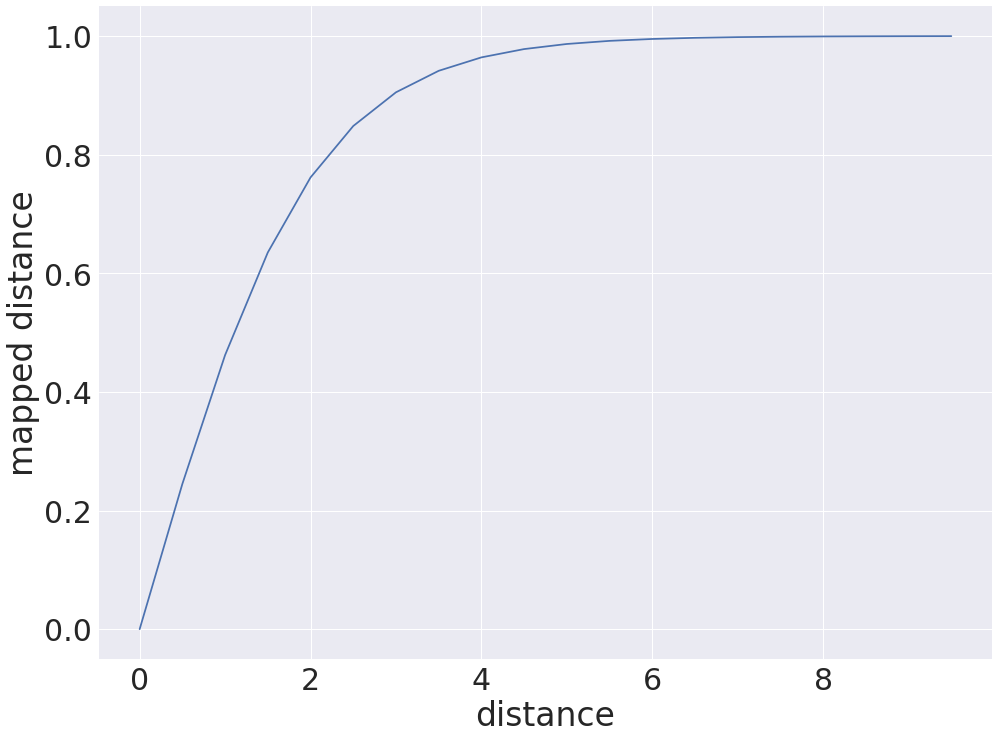

In [32]:
plt.plot(distances, mapped_distances)
plt.xlabel('distance')
plt.ylabel('mapped distance');

With different bases

In [39]:
distances = np.arange(0, 10, 0.5)

bases = [-200, 10, 0, 10, 200]
results = []
repeat = 0

for base in bases:

    mapped_distances = []
    for distance in distances:
        vector = create_vector(base, distance, repeat)
        out = softmax(vector, t=G, minicolumns=vector.size)
        mapped_distance = out[0] - out[1]
        mapped_distances.append(mapped_distance)
    
    results.append(np.copy(mapped_distances))

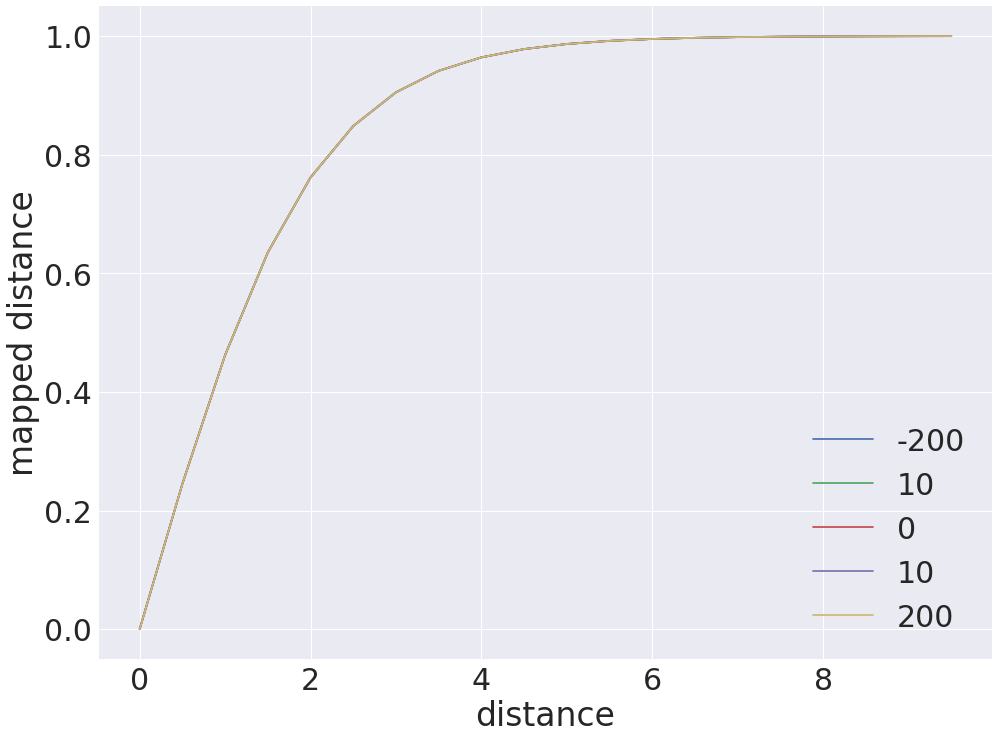

In [40]:
for base, mapped_distances in zip(bases, results):

    plt.plot(distances, mapped_distances, label=str(base))

plt.xlabel('distance')
plt.ylabel('mapped distance');
plt.legend();


It does not seem to vary with the base but, which is good, but it SHOULD vary with the constant G.

In [42]:
distances = np.arange(0, 10, 0.5)

Gs = [0.1, 1.0, 5.0, 10]
results = []
repeat = 0
base = 1.0

for G in Gs:

    mapped_distances = []
    for distance in distances:
        vector = create_vector(base, distance, repeat)
        out = softmax(vector, t=G, minicolumns=vector.size)
        mapped_distance = out[0] - out[1]
        mapped_distances.append(mapped_distance)
    
    results.append(np.copy(mapped_distances))

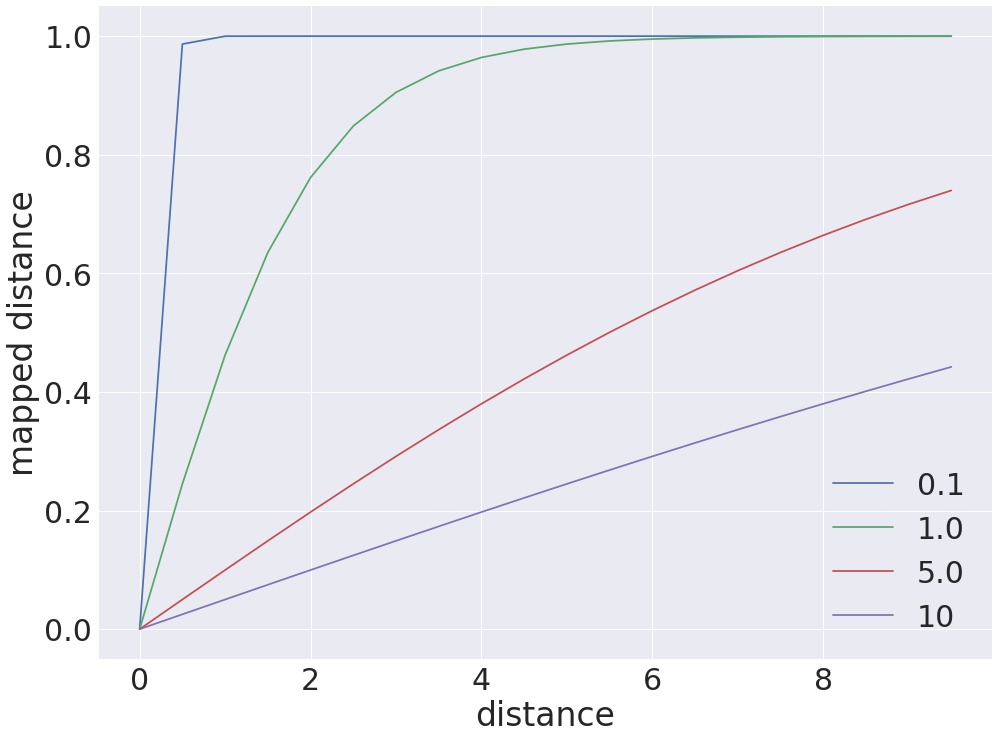

In [43]:
for G, mapped_distances in zip(Gs, results):

    plt.plot(distances, mapped_distances, label=str(G))

plt.xlabel('distance')
plt.ylabel('mapped distance');
plt.legend();

This is exactly what we expected

For completeness let's check vector size

In [44]:
distances = np.arange(0, 10, 0.5)

repeats = [0, 5, 10, 50]
results = []
base = 1.0
G = 1.0

for repeat in repeats:

    mapped_distances = []
    for distance in distances:
        vector = create_vector(base, distance, repeat)
        out = softmax(vector, t=G, minicolumns=vector.size)
        mapped_distance = out[0] - out[1]
        mapped_distances.append(mapped_distance)
    
    results.append(np.copy(mapped_distances))

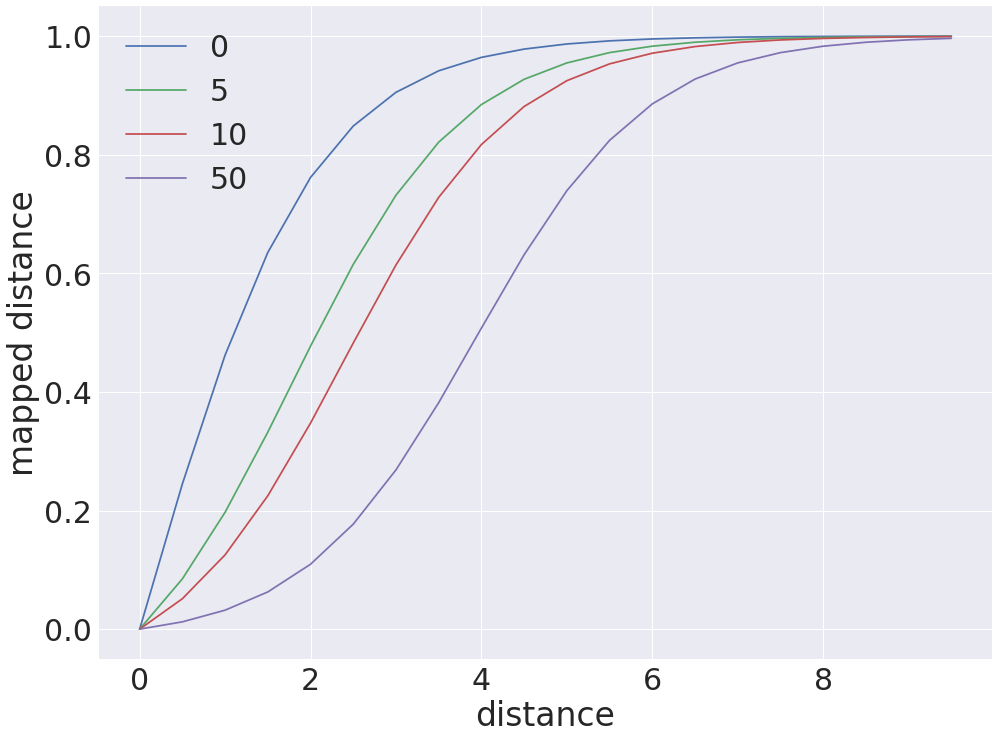

In [45]:
for repeat, mapped_distances in zip(repeats, results):

    plt.plot(distances, mapped_distances, label=str(repeat))

plt.xlabel('distance')
plt.ylabel('mapped distance');
plt.legend();